# GP Regression Demo
This demonstration covers the basics of a supervised learning problem with gptorch:
* Defining a model
* Training the model
* Predicting with the model

In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

In [2]:
from gptorch.models.gpr import GPR
from gptorch.models.sparse_gpr import VFE
from gptorch import kernels
from gptorch.util import TensorType
from gptorch import mean_functions

In [3]:
from gptorch import kernels

## Ground truth and training data
We'll try to model a simple one-dimensional sinusoid.

In [4]:
def f(x):
    return np.sin(2. * np.pi * x) + np.cos(3.5 * np.pi * x) - 3.0 * x + 5.0

In [5]:
n = 100
x = np.linspace(0, 1, n).reshape((-1, 1))
y = f(x) + 0.1 * np.random.randn(n, 1)

## Model definition
Here, we define the GP model.

We can use a simple vanilla GP or a sparse GP.

In [6]:
# Try different kernels...
# kern = kernels.Rbf(1)
# kern = kernels.Matern32(1)
kern = kernels.Linear(1) + kernels.Rbf(1) + kernels.Constant(1)

In [7]:
# Try different models:
# model = GPR(y, x, kern)
model = VFE(y, x, kern)
model.likelihood.variance.data = TensorType([1.0e-6])

Inducing points:
[[0.06060606]
 [0.28787879]
 [0.37373737]
 [0.18181818]
 [0.43939394]
 [0.7979798 ]
 [0.93434343]
 [0.58585859]
 [0.68181818]
 [0.50505051]]


## Train the model

In [8]:
# Train
model.optimize(method="L-BFGS-B", max_iter=100)
print("Trained model:")
print(model)

Scipy.optimize.minimize...
loss: [124.51787035]
loss: [99.61121948]
loss: [96.71216188]
loss: [90.88831524]
loss: [58.33767014]
loss: [55.50233804]
loss: [1.48023954e+20]
loss: [2.63194475e+08]
loss: [31081.29557332]
loss: [83.45459724]
loss: [55.57673503]
loss: [55.04979703]
loss: [52.29920714]
loss: [41.39427135]
loss: [-0.29957183]
loss: [16.91521322]
loss: [-62.99354116]
loss: [7139.34852889]
loss: [-64.73185849]
loss: [-66.27379356]
loss: [-64.81824602]
loss: [-66.37833994]
loss: [-67.33440715]
loss: [-67.4399201]
loss: [-67.51481697]
loss: [-67.65728062]
loss: [-67.8935304]
loss: [-68.41567477]
loss: [51.75660775]
loss: [-68.45305462]
loss: [-68.61096053]
loss: [-68.84487818]
loss: [-68.91767537]
loss: [-69.01425714]
loss: [-69.0381912]
loss: [-69.05694132]
loss: [-69.06449688]
loss: [-69.06746817]
loss: [-69.06898693]
loss: [-69.07103528]
loss: [-69.07683349]
loss: [-69.08392541]
loss: [-69.09666827]
loss: [-69.12674674]
loss: [-69.16744494]
loss: [-61.23623311]
loss: [-69.19898

## Predict

In [9]:
# Predict
n_test = 200
n_samples = 5
x_test = np.linspace(-1, 2, n_test).reshape((-1, 1))
mu, s = model.predict_y(x_test)
mu, s = mu.data.numpy().flatten(), s.data.numpy().flatten()
y_samp = model.predict_y_samples(x_test, n_samples=n_samples).data.numpy()
unc = 2.0 * np.sqrt(s)

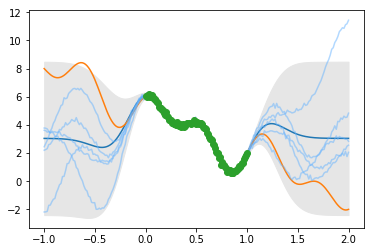

In [10]:
# Show prediction
x_test = x_test.flatten()
plt.figure()
plt.fill_between(x_test, mu - unc, mu + unc, color=(0.9,) * 3)
plt.plot(x_test, mu)
plt.plot(x_test, f(x_test))
for y_samp_i in y_samp:
    plt.plot(x_test, y_samp_i, color=(0.4, 0.7, 1.0), alpha=0.5)
plt.plot(x, y, 'o')
plt.show()